<a href="https://colab.research.google.com/github/AndrewstheBuilder/DeepLearning/blob/main/TitanicKaggleChallenge_Blog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Explore the dataset and do data analysis. Used https://www.kaggle.com/code/startupsci/titanic-data-science-solutions for data analysis inspiration

In [18]:
# Read in data and see a preview of it using .head()
data = pd.read_csv('./drive/MyDrive/Titanic_Challenge/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Convert categorical datatypes 'Sex' and 'Embarked' into numeric
  # to do correlation calculation
numeric_df = data.select_dtypes(include=[float, int])
numeric_df['Sex'] = data['Sex'].map({'male': 0, 'female':1})
numeric_df['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2})

# numeric_df.head()
numeric_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939,-0.030555
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351,0.108669
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900,0.043835
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254,0.012186
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631,-0.060606
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489,-0.079320
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333,0.063462
Sex,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000,0.118593
Embarked,-0.030555,0.108669,0.043835,0.012186,-0.060606,-0.079320,0.063462,0.118593,1.000000


**Gain an intuition** for how the correlation calculation works by using a tiny example. **What I found**: the best correlations have graphs that depict a monotonic relationship like the sigmoid function and not curves like the piece wise function (graphed below)

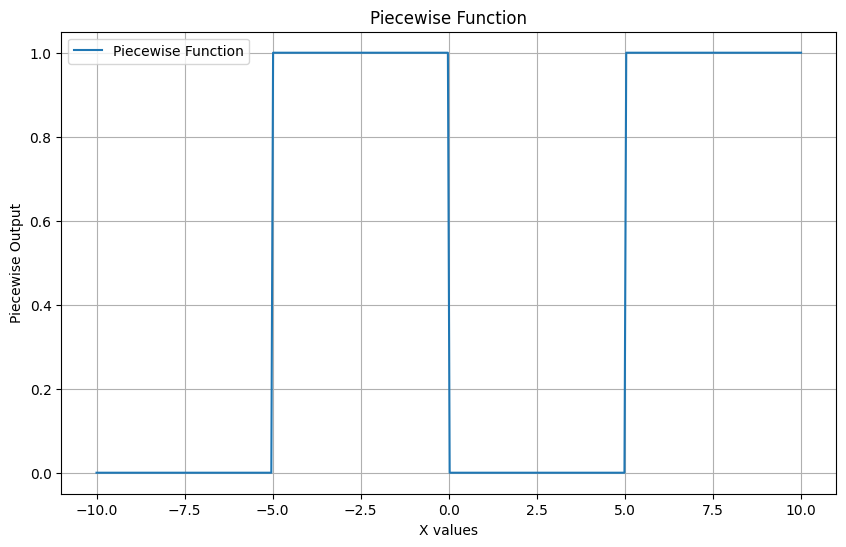

Correlation coefficient: 0.43301405506325596


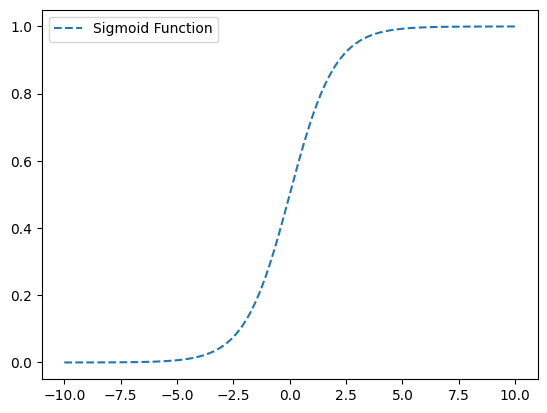

Sigmoid Correlation coefficient: 0.9362677445388511


In [22]:
# Prove to myself that outputs going up and down will give a bad correlation
# Correlation only captures monotonic relationships
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def piecewise(x):
    if x < -5:
        return 0
    elif -5 <= x < 0:
        return 1
    elif 0 <= x < 5:
        return 0
    else:
        return 1

# Generate x values
x = np.linspace(-10, 10, 400)  # 400 points from -10 to 10

# Apply the piecewise function to each x value
y = np.array([piecewise(xi) for xi in x])

# Plotting the Sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Piecewise Function')
plt.title('Piecewise Function')
plt.xlabel('X values')
plt.ylabel('Piecewise Output')
plt.grid(True)
plt.legend()
plt.show()

# Create a DataFrame
data_piecewise = pd.DataFrame({'X': x, 'Y': y})

# Calculate correlation
correlation = data_piecewise['X'].corr(data_piecewise['Y'])
print("Correlation coefficient:", correlation)

# Monotonic function - Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Apply the sigmoid function to each x value
y_sigmoid = np.array([sigmoid(xi) for xi in x])

# Plotting the Sigmoid function on the same plot
plt.plot(x, y_sigmoid, label='Sigmoid Function', linestyle='--')
plt.legend()
plt.show()

# Create a DataFrame for the sigmoid function
data_sigmoid = pd.DataFrame({'X': x, 'Y_Sigmoid': y_sigmoid})

# Calculate correlation for sigmoid
correlation_sigmoid = data_sigmoid['X'].corr(data_sigmoid['Y_Sigmoid'])
print("Sigmoid Correlation coefficient:", correlation_sigmoid)

Below plot shows why pandas.corr() may not be the most reliable metric for showing which features(Age, Embarked,etc) are the most important to deciding whether a passenger lived or died. **The data is up and down**: As age goes up there is no clear rise or fall in deaths its behaving more like the piece wise function and not like the sigmoid function above.

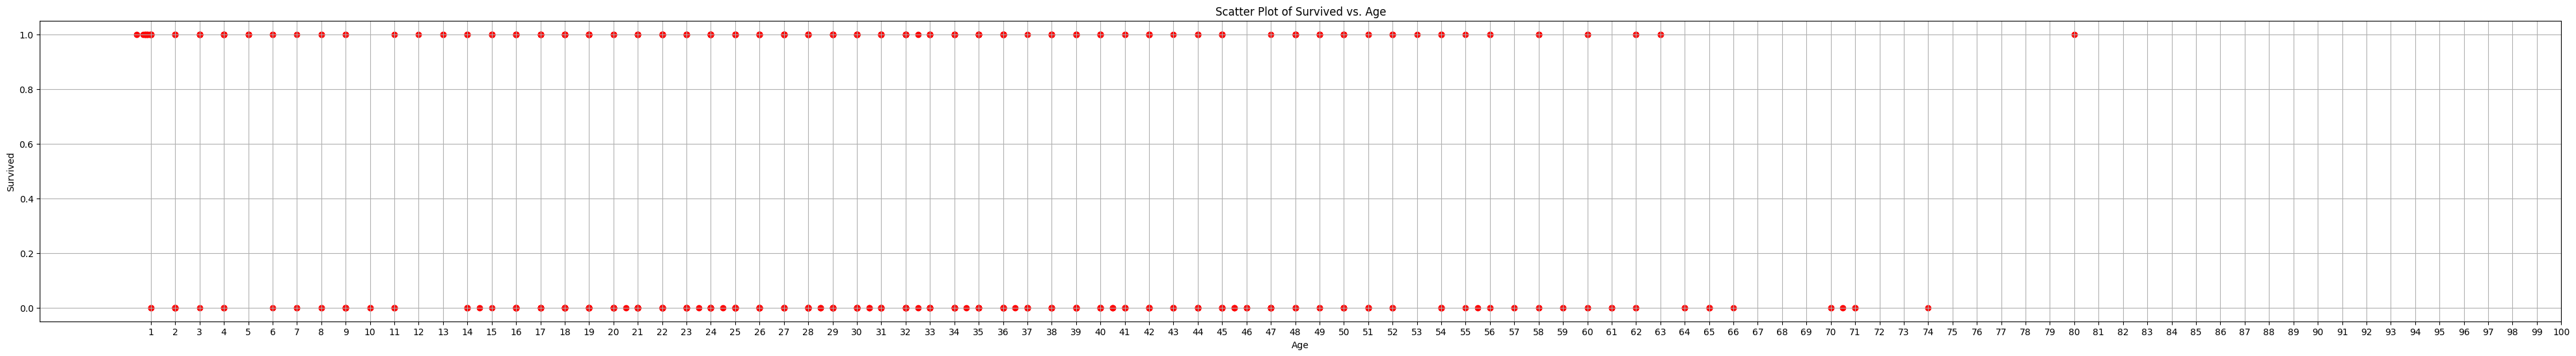

In [19]:
# Completely useless plot
# But it shows why the correlation calculation would not work.
# The data is up and down
plt.figure(figsize=(50,6))
plt.scatter(data['Age'], data['Survived'], alpha=1, color='red')
plt.title("Scatter Plot of Survived vs. Age")
plt.xlabel('Age')
plt.ylabel('Survived')
plt.xticks(range(1, 101, 1))
plt.grid(True)
plt.show()

In [21]:
# Determine Age bands and check correlation with Survived
# print(pd.cut(data['Age'],5))
# print(data['Age'].head())
data['AgeBand'] = pd.cut(data['Age'], 5)
data[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909
